In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [15]:
df = pd.read_excel(r"C:\Users\Raiyana Reyaz\OneDrive\Desktop\data science assignments\random forest assignment\glass data.xlsx")
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


### 1.EDA


In [16]:
print("\n----- First 5 Rows -----")
print(df.head())

print("\n----- Dataset Shape -----")
print(df.shape)

print("\n----- Data Types -----")
print(df.dtypes)

print("\n----- Missing Values -----")
print(df.isnull().sum())


----- First 5 Rows -----
        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1

----- Dataset Shape -----
(214, 10)

----- Data Types -----
RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

----- Missing Values -----
RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


In [17]:
print("\n----- Summary Statistics -----")
print(df.describe())


----- Summary Statistics -----
               RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516522   12.907500    2.115000    1.190000   72.280000    0.122500   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.555000   
75%      1.519157   13.825000    3.600000    1.630000   73.087500    0.610000   
max      1.533930   17.380000    4.490000    3.500000   75.410000    6.210000   

               Ca          Ba          Fe        Type  
count  214.000000  214.000000  214.000000  214.000000  
mean     8.956963    0.175047    0.057009    2.780374  
std      1.423153    0.497219    0.097439    2.103739  
min      5.430

In [18]:
# Outlier detection using IQR

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))

print("\n----- Number of Outliers in Each Column -----")
print(outliers.sum())


----- Number of Outliers in Each Column -----
RI      17
Na       7
Mg       0
Al      18
Si      12
K        7
Ca      26
Ba      38
Fe      12
Type    29
dtype: int64


In [19]:
print("\n----- Count of Zero Values in Each Column -----")
print((df == 0).sum())


----- Count of Zero Values in Each Column -----
RI        0
Na        0
Mg       42
Al        0
Si        0
K        30
Ca        0
Ba      176
Fe      144
Type      0
dtype: int64


Missing Values: None
• Outliers: Present in most numeric columns, especially Al, Ca, Ba
• Zero Values: Common in Mg, K, Ba, Fe (valid for this dataset)
• Data Consistency: No inconsistent or invalid entries
• No impossible values

### 2.DATA VISUALIZATION

<Figure size 1200x1000 with 0 Axes>

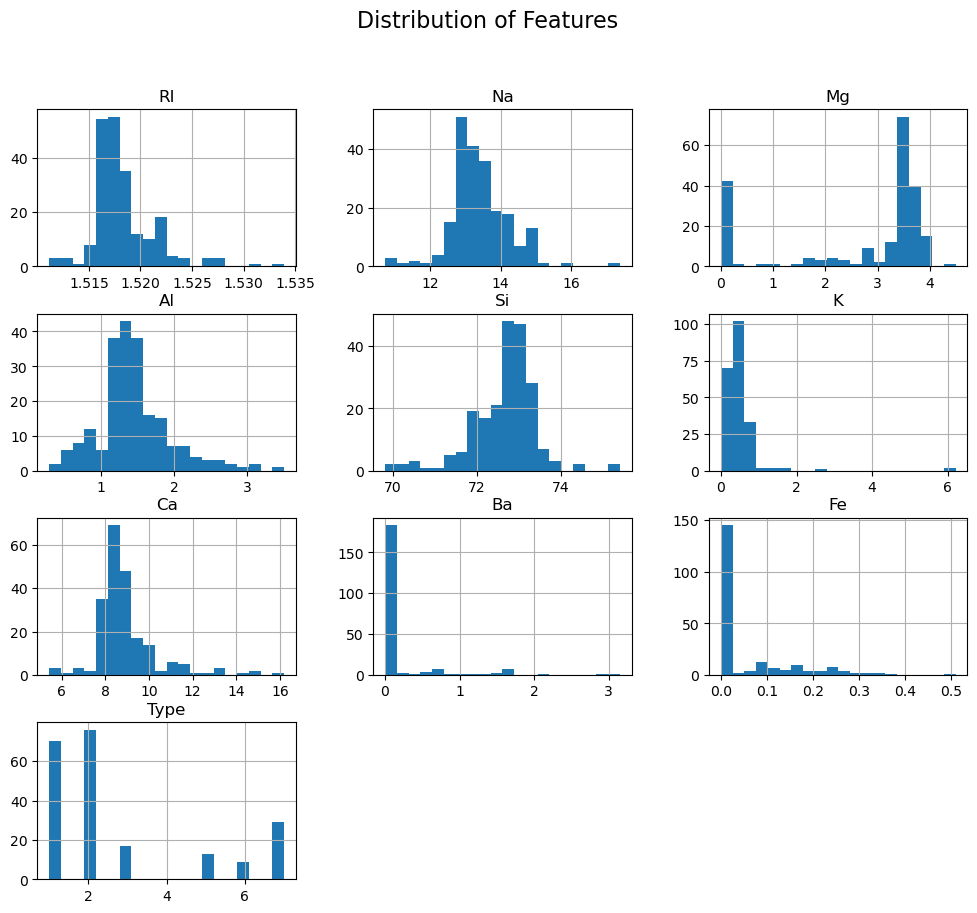

In [20]:
# Histogram – Distribution of Each Feature
plt.figure(figsize=(12,10))
df.hist(figsize=(12,10), bins=20)
plt.suptitle("Distribution of Features", fontsize=16)
plt.show()

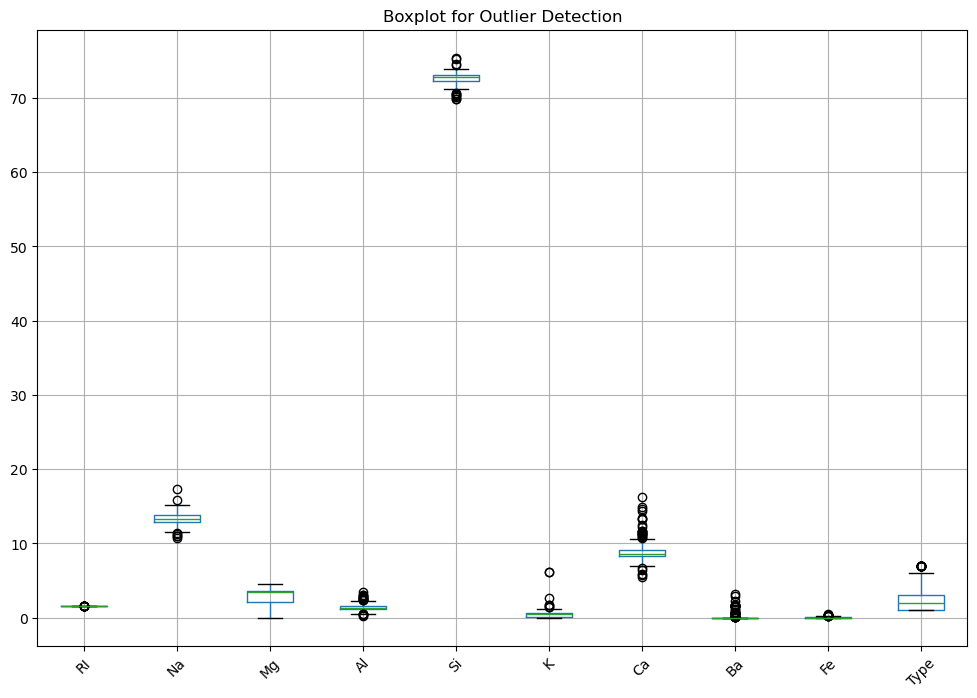

In [11]:
# Boxplots – Check for Outliers
plt.figure(figsize=(12,8))
df.boxplot()
plt.title("Boxplot for Outlier Detection")
plt.xticks(rotation=45)
plt.show()

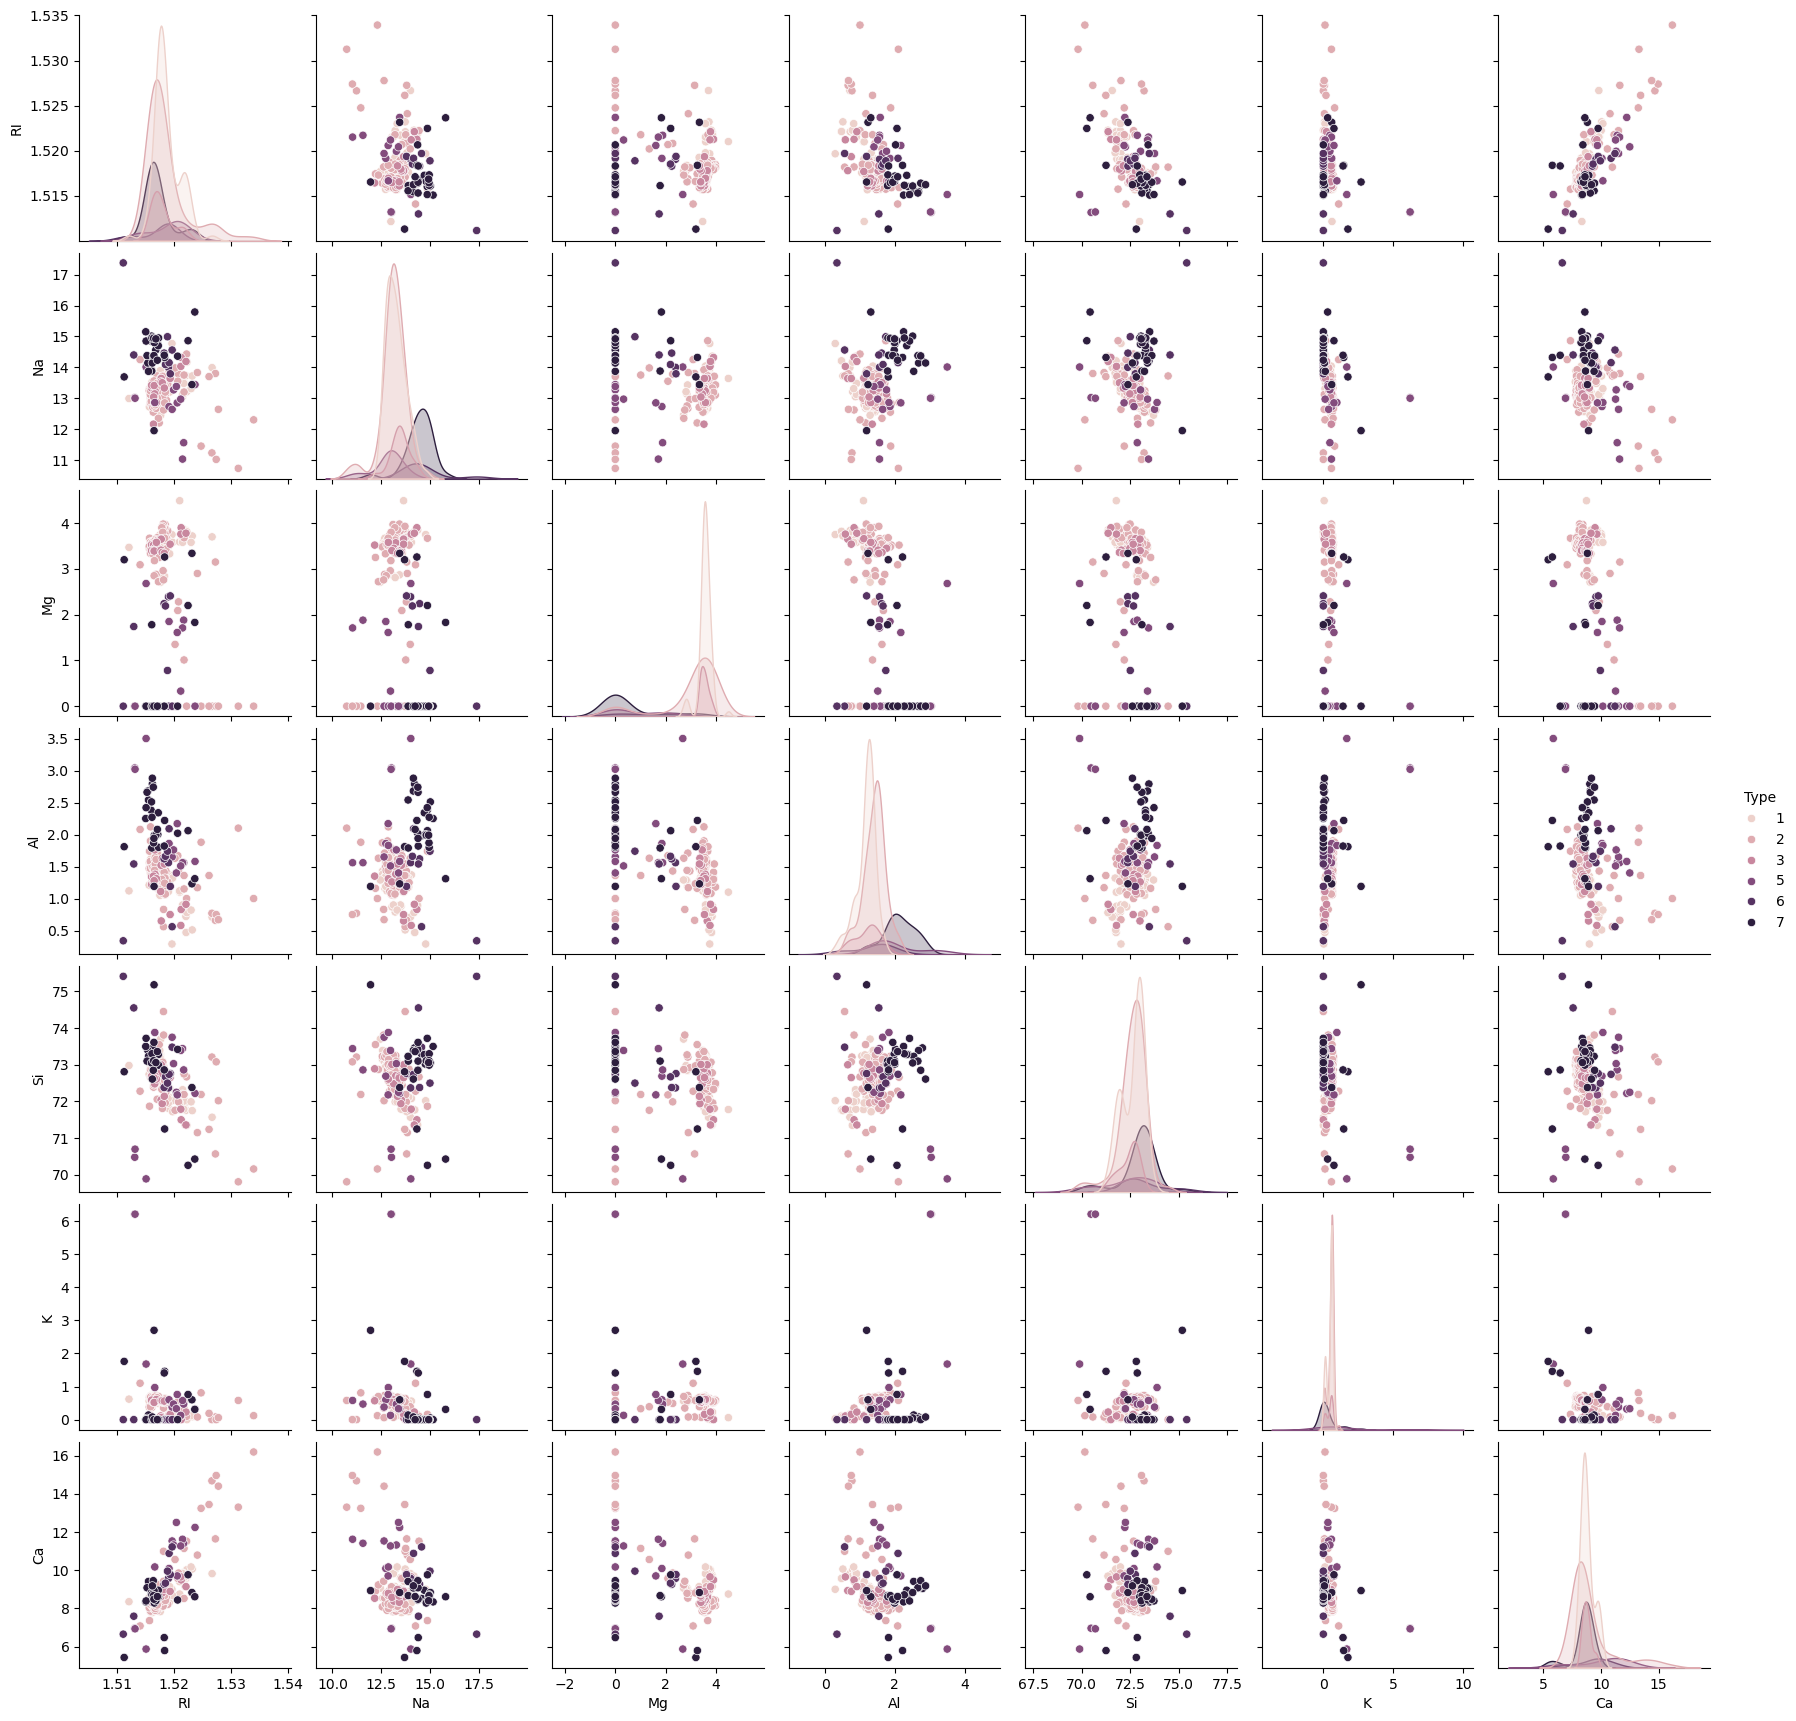

In [12]:
#Pair Plot – Relationship Between Features
sns.pairplot(df[['RI','Na','Mg','Al','Si','K','Ca','Type']], hue='Type')
plt.show()

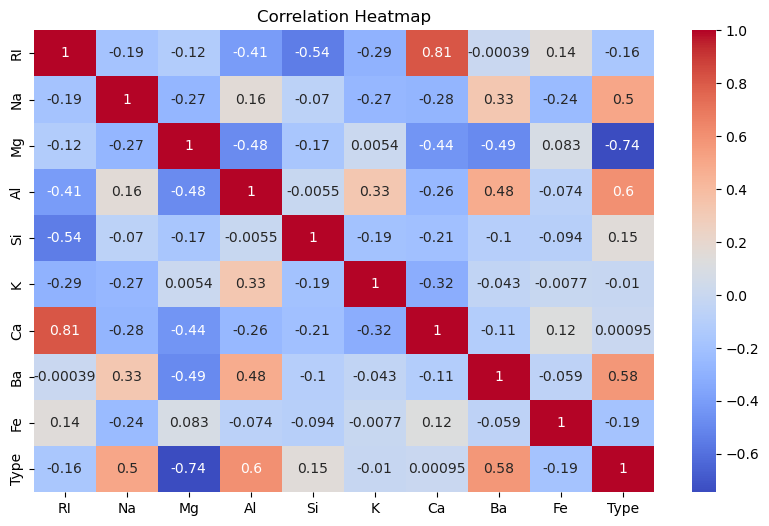

In [13]:
#Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

Strong Positive Correlations
1.RI and Ca show a very strong positive correlation (0.81) → glasses with more calcium have higher refractive index.
2.Al and Type show a strong positive correlation (0.60) → some glass types contain more aluminum.
3.Ba and Type also show positive correlation (0.58) → certain glass types have higher barium.

Strong Negative Correlations
1.Mg and Type have strong negative correlation (–0.74) → higher magnesium is linked to lower glass types.
2.RI and Si are negatively correlated (–0.54) → silica-rich glasses tend to have lower refractive index.
3.Mg and Al also show negative relationship (–0.48).

Features like Fe and K do not strongly affect others.
RI strongly depends on Ca and Si.

### 3.Data Preprocessing

In [25]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

X = df.drop("Type", axis=1)
y = df["Type"]

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
sm = SMOTE(random_state=42, k_neighbors=3)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train_scaled, y_train)

print("Original class distribution:\n", y_train.value_counts())
print("\nAfter SMOTE:\n", y_train_resampled.value_counts())


Original class distribution:
 Type
2    57
1    52
7    21
3    13
5    10
6     7
Name: count, dtype: int64

After SMOTE:
 Type
1    57
5    57
2    57
7    57
3    57
6    57
Name: count, dtype: int64


### 4.Random Forest Model Implementation

Although feature scaling (Standardization) was performed as part of preprocessing, tree-based models such as Random Forest, Bagging, and Boosting do not require scaled features because they split data based on thresholds, not distances. Therefore, for model training, the unscaled feature set (X_train, X_test) was used.

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

rf = RandomForestClassifier(n_estimators=100,      # number of trees
    max_depth=None,       # allow trees to grow fully
    random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [30]:
y_pred = rf.predict(X_test)
y_pred

array([1, 3, 7, 2, 7, 2, 7, 1, 1, 1, 1, 1, 2, 1, 2, 3, 1, 6, 2, 5, 1, 1,
       5, 2, 7, 2, 7, 7, 1, 5, 1, 1, 2, 1, 7, 1, 2, 2, 7, 2, 1, 2, 2, 1,
       2, 1, 1, 1, 6, 1, 1, 2, 6, 2])

In [31]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted')
rec = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Random Forest Performance:")
print("--------------------------")
print("Accuracy       :", acc)
print("Precision      :", prec)
print("Recall         :", rec)
print("F1 Score       :", f1)

Random Forest Performance:
--------------------------
Accuracy       : 0.8333333333333334
Precision      : 0.8493967452300786
Recall         : 0.8333333333333334
F1 Score       : 0.8290123456790123


In [32]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[17  1  0  0  0  0]
 [ 3 14  0  1  1  0]
 [ 2  0  2  0  0  0]
 [ 0  1  0  2  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  8]]

Classification Report:
              precision    recall  f1-score   support

           1       0.77      0.94      0.85        18
           2       0.88      0.74      0.80        19
           3       1.00      0.50      0.67         4
           5       0.67      0.67      0.67         3
           6       0.67      1.00      0.80         2
           7       1.00      1.00      1.00         8

    accuracy                           0.83        54
   macro avg       0.83      0.81      0.80        54
weighted avg       0.85      0.83      0.83        54



### 5.Bagging and Boosting Methods


In [33]:
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# -------------------------------
# 1. BAGGING
# -------------------------------
bagging = BaggingClassifier(n_estimators=100, random_state=42)
bagging.fit(X_train, y_train)
y_pred_bag = bagging.predict(X_test)

print("----- Bagging Classifier -----")
print("Accuracy:", accuracy_score(y_test, y_pred_bag))
print(classification_report(y_test, y_pred_bag))

# -------------------------------
# 2. BOOSTING → ADABOOST
# -------------------------------
ada = AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)

print("----- AdaBoost Classifier -----")
print("Accuracy:", accuracy_score(y_test, y_pred_ada))
print(classification_report(y_test, y_pred_ada))

# -------------------------------
# 3. BOOSTING → GRADIENT BOOSTING
# -------------------------------
gb = GradientBoostingClassifier(n_estimators=150, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

print("----- Gradient Boosting Classifier -----")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))




----- Bagging Classifier -----
Accuracy: 0.8148148148148148
              precision    recall  f1-score   support

           1       0.79      0.83      0.81        18
           2       0.83      0.79      0.81        19
           3       1.00      0.50      0.67         4
           5       0.67      0.67      0.67         3
           6       0.67      1.00      0.80         2
           7       0.89      1.00      0.94         8

    accuracy                           0.81        54
   macro avg       0.81      0.80      0.78        54
weighted avg       0.82      0.81      0.81        54

----- AdaBoost Classifier -----
Accuracy: 0.5185185185185185
              precision    recall  f1-score   support

           1       0.53      0.89      0.67        18
           2       0.62      0.26      0.37        19
           3       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         2
           

C:\Users\Raiyana Reyaz\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Raiyana Reyaz\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Raiyana Reyaz\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


----- Gradient Boosting Classifier -----
Accuracy: 0.8148148148148148
              precision    recall  f1-score   support

           1       0.88      0.78      0.82        18
           2       0.83      0.79      0.81        19
           3       1.00      0.75      0.86         4
           5       0.67      0.67      0.67         3
           6       0.40      1.00      0.57         2
           7       0.89      1.00      0.94         8

    accuracy                           0.81        54
   macro avg       0.78      0.83      0.78        54
weighted avg       0.84      0.81      0.82        54



 Bagging vs Boosting – Final Comparison
 Bagging Classifier (Accuracy: 81.48%): Handles imbalance and noise well and Produces stable results
 AdaBoost (Accuracy: 51.85%): Performs poorly on this dataset and Overfits because weights on misclassified samples increase rapidly
 Gradient Boosting (Accuracy: 81.48%): Performs close to Bagging and More stable than AdaBoost

1. Explain Bagging and Boosting methods. How are they different from each other?
- a) Bagging (Bootstrap Aggregating)
Bagging is an ensemble method where multiple models are trained independently on different bootstrapped (randomly sampled with replacement) subsets of the training data.
All models run in parallel, and the final prediction is made by majority voting.
Reduces variance (helps avoid overfitting).
Example: Random Forest
- b) Boosting
Boosting trains multiple models sequentially, where each new model tries to correct the mistakes of the previous one.
More weight is given to misclassified samples.
Reduces bias (creates a strong learner from weak learners).
Examples: AdaBoost, Gradient Boosting, XGBoost

2. Explain how to handle imbalance in the data
- a)  Oversampling (Increase minority class samples): You artificially increase the number of minority class samples.Example:SMOTE (Synthetic Minority Oversampling Technique)
- b) Undersampling (Reduce majority class samples)
- c) Or use algorithms like Random Forest / Gradient Boosting that manage imbalance well